# ChaosCrypto.jl

#### Autores: 
- [Yuriko Yamamoto](https://github.com/Yuriyama "Yuriyama")
- [David Amaro Alcalá](https://github.com/davidamaro "davidamaro")
- [Ignacio Vargas](https://github.com/ignacio-vc "ignacio-vc")

## Uso del caos para transmitir mensajes encriptados (utilizando Integración con Taylor)

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Si *x(t)* es la señal que se transmite.
Lo que se recibe es:

$xr = x(t)$

$yr = rx(t) -yr -x(t)zr$

$zr = x(t)yr -bzr$

Las ecuaciones de quien recibe el mensaje

$xr = \sigma(yr - xr)$ 
    
$yr = ρs(t) - yr - s(t)zr$
            
$zr = s(t)yr - \beta zr$

donde

$s(t) = x(t) + m(t)$

y $m(t) = sin(t)$

Con parámetros base:
ρ = 60
σ = 10
β = 8/3

### 9.6.2 (Pecora and Carroll’s approach) 
In the pioneering work of Pecora and Carroll (1990), one of the receiver variables is simply set equal to the corresponding transmitter variable.  
For instance, if $x(t)$ is used as the transmitter drive signal, then the receiver equations are

$x(t) = x(t)$  
$\dot{y_r} = [rx(t)] - [y_r] - [x(t)z_r]$  
$\dot{z_r} = [x(t)y_r] - [bz_r]$  

where the first equation is not a differential equation. Their numerical simulations and a heuristic argument suggested that  
$y_r(t) → y(t)$ and $z_r(t) → z(t)$ as $t → ∞$ even if there were differences in the initial conditions.  

### 9.6.3 (Computer experiments on synchronized chaos) 
Let $x, y, z$ be governed by the Lorenz equations with $r = 60, σ = 10, b = 8/3$.  
Let $x_r, y_r, z_r$ be governed by the system in Exercise 9.6.2.  
Choose different initial conditions for $y$ and $y_r$, and similarly for $z$ and $z_r$, and then start integrating numerically.  

a) Plot $y(t)$ and $y_r(t)$ on the same graph. With any luck, the two time series should eventually merge, even though both are chaotic.  
b) Plot the $(y,z)$ projection of both trajectories.

In [1]:
;cd ../test

/data/Documents/Physics/2016-2/ChaosCrypto.jl/test


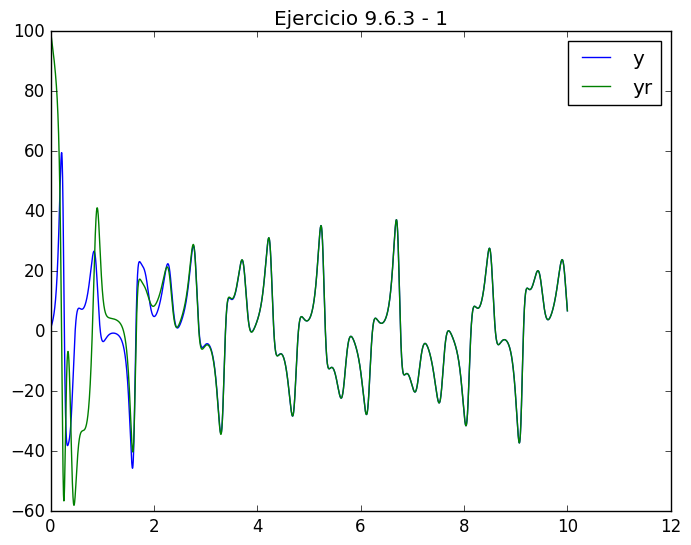

In [2]:
include("testejercicio11.jl")

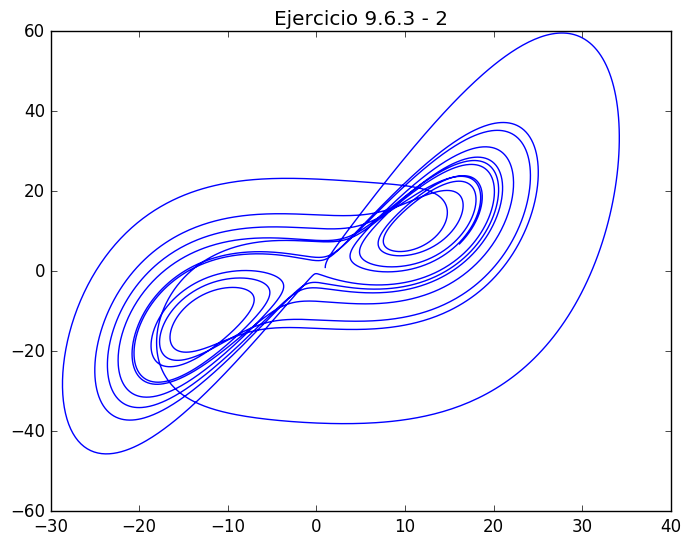

In [3]:
include("testejercicio12.jl")

### 9.6.4 (Some drives don’t work) 
Suppose $z(t)$ were the drive signal in Exercise 9.6.2, instead of $x(t)$. In other words, we replace $z_r$ by $z(t)$ everywhere in the receiver equations, and watch how $x_r$ and $y_r$ evolve.

a) Show numerically that the receiver does not synchronize in this case.  
b) What if $y(t)$ were the drive?

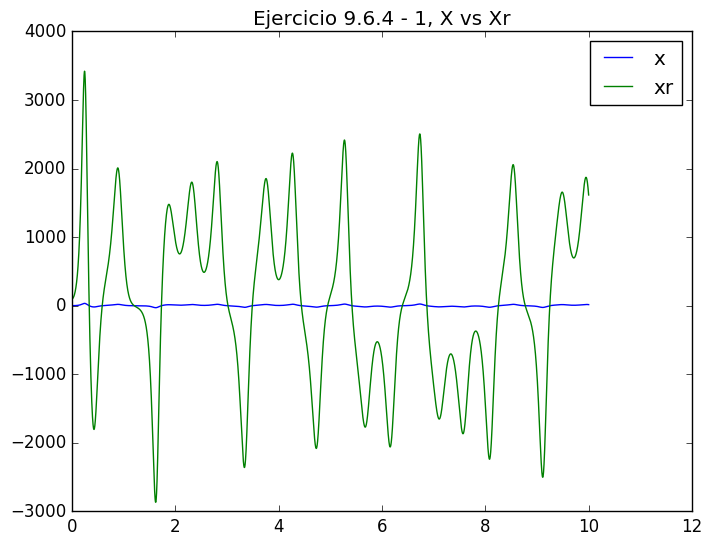

In [4]:
include("testejercicio21-xxr.jl")

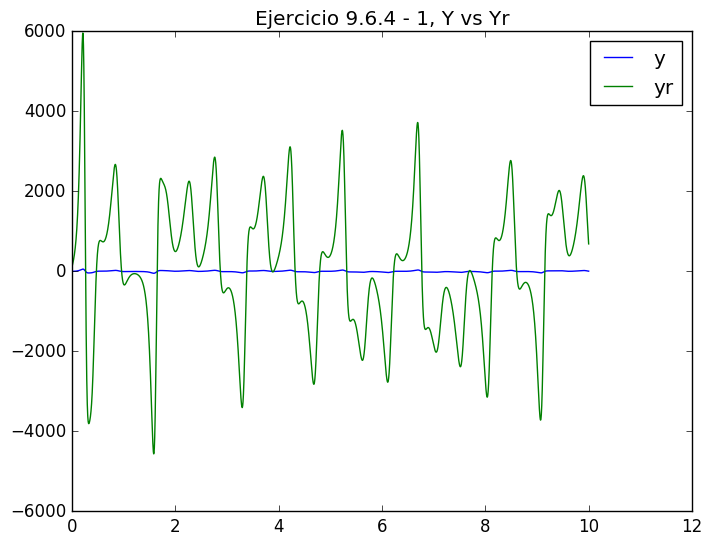

In [5]:
include("testejercicio21-yyr.jl")

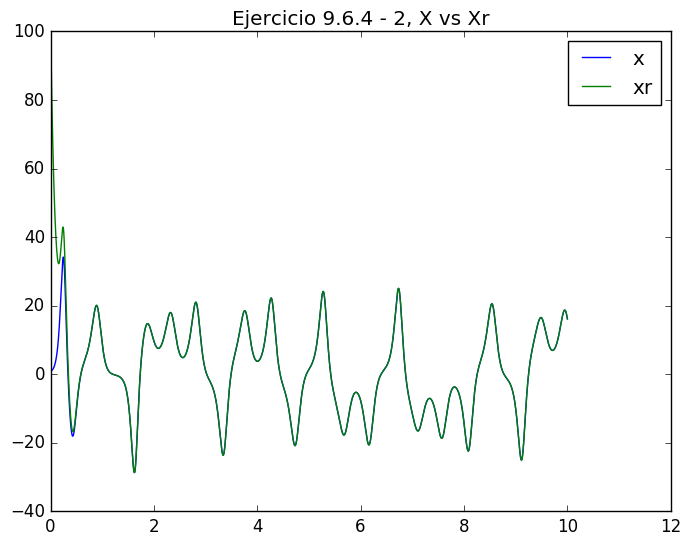

In [6]:
include("testejercicio22-xxr.jl")

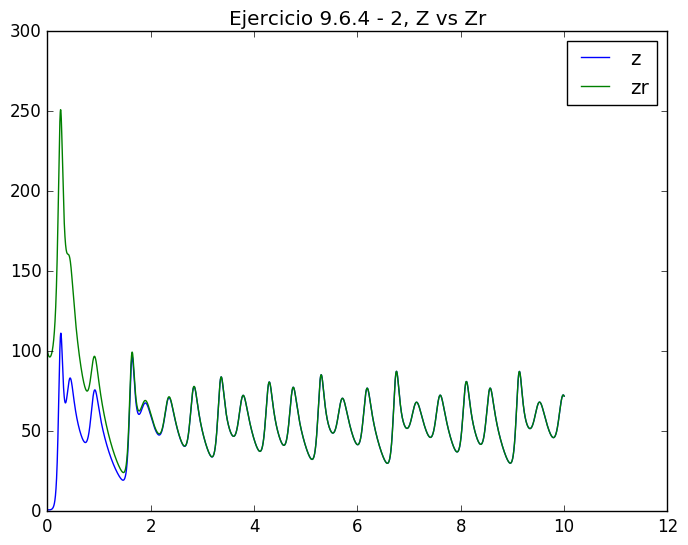

In [7]:
include("testejercicio22-zzr.jl")

#### 9.6.5 (Masking)
In their signal-masking approach, Cuomo and Oppenheim (1992, 1993) use the following receiver dynamics:

$\dot{x_r} = \sigma (y_r - x_r)$  
$\dot{y_r} = [rs(t)] - [y(r)] - [s(t)z_r]$   
$\dot{z_r} = [s(t)y_r] - [bz_r]$  

where  $s(t) = x(t) + m(t)$,  and $m(t)$ is the low-power message added to the much stronger chaotic mask $x(t)$. If the receiver has synchronized with the drive, then $x_r(t) ≈ x(t)$ and so $m(t)$ may be recovered as  $\hat{m}(t) = s(t) - x_r(t)$

Test this approach numerically, using a sine wave for $m(t)$. How close is the estimate  to the actual message $m(t)$? How does the error depend on the frequency of the sine wave?

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"ρr",1,"1",Interact.OptionDict(Any["1","10","24","25","60"],Dict{Any,Any}("24"=>24,"1"=>1,"10"=>10,"25"=>25,"60"=>60)),Any[],Any[])

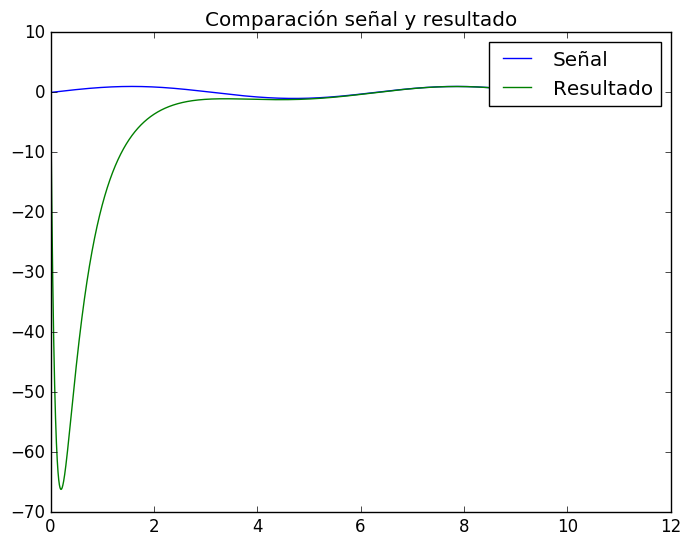

In [12]:
include("ejercicio3taylor.jl")
#correr dos veces

Interact.Slider{Float64}(Signal{Float64}(0.041, nactions=0),"φ",0.041,0.001:0.01:0.091,true)

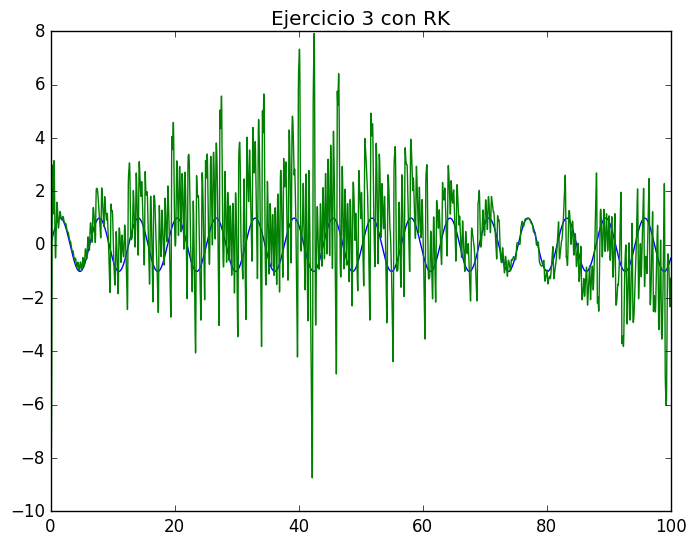

In [9]:
include("testejercicio3.jl")

#### Variación de Parámetros

Interact.Slider{Float64}(Signal{Float64}(0.14509999999999998, nactions=0),"φ",0.14509999999999998,0.0001:0.005:0.2951,true)

φ = 0.14509999999999998


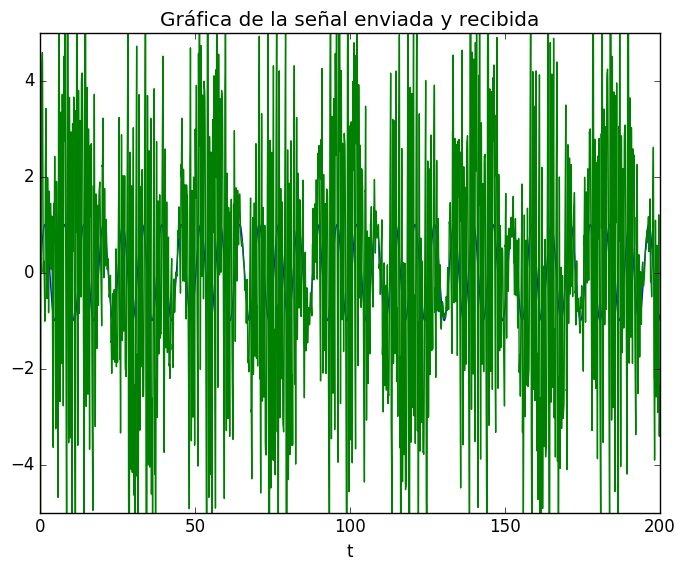

In [10]:
include("Graph34.jl")

Interact.Slider{Float64}(Signal{Float64}(0.14509999999999998, nactions=0),"φ",0.14509999999999998,0.0001:0.005:0.2951,true)

φ = 0.14509999999999998


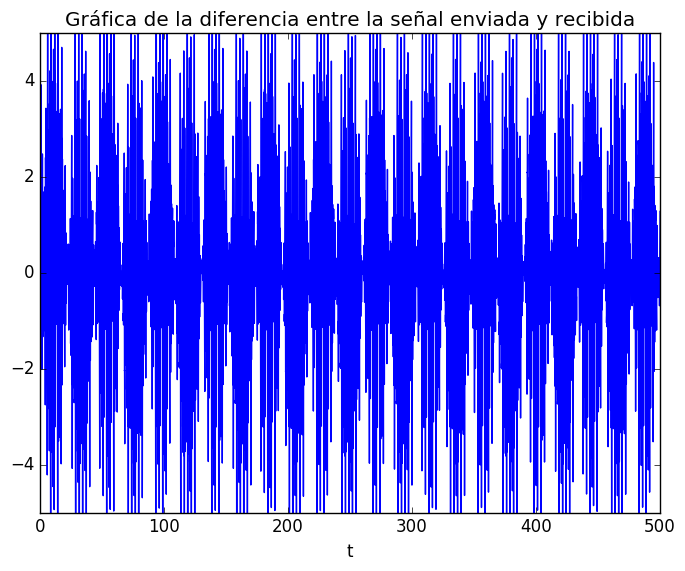

In [13]:
include("Graph35.jl")

Cuando la frecuencia es muy pequeña, el mensaje enviado y el recibido son muy parecidos, después de un lapso de tiempo pequeño, ambas señales se sincronizan aunque al transcurrir el tiempo poco a poco van perdiendo sincronización.

Conforme la fecuencia de la señal (seno) va aumentando, el mensaje recibido se parece menos al enviado; sin embargo, se observa que después de un cierto tiempo y con mayor frecuencia, las señales se sincronizan por un corto lapso de tiempo.

#### Referencias:

##### Caos, Criptologia

[Nonlinear Dynamics and Chaos - Strogatz (2014)](http://libgen.io/get.php?md5=93608D1E7D48FF61D25173674AF85BD7&key=ALGOHY9BRV5DVM5D "Lib Genesis")

[Synchronization of Lorenz-Based Chaotic Circuits with Applications to Communications](http://www.rle.mit.edu/dspg/documents/SynchroofLorenz.pdf "Artículo")

[Chaos Applications in Telecommunications](http://libgen.io/get.php?md5=0C28EB7B594F94B10BDD9B9391228D85&key=OCJBN9OTSRT306XH "Lib Genesis")

[Handbook of Chaos Control](http://libgen.io/get.php?md5=97455994EC81072A20A21293532926D1&key=I33OJ1BYKTFE0R1S "Lib Genesis")

[Using Chaos to Send Secret Messages](http://bulldog2.redlands.edu/fac/joanna_bieri/nonlinear/Chotic_Messages.pdf "powerpoint")

[Edward Lorenz's Strange Attraction](https://logicaltightrope.com/2013/08/29/edward-lorenzs-strange-attraction/ "blog")

[Sending Your Secrets Safely with Chaos](https://logicaltightrope.com/2013/09/01/sending-your-secrets-safely-with-chaos/ "blog")

[A secret message from another dimension](https://web.archive.org/web/20150214122103/http://jellymatter.com/2012/01/04/a-secret-message-from-another-dimension/ "ejemplo")